<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

**Importing the dataset**

In [4]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.shape

(400, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

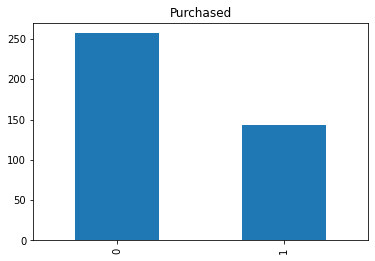

In [14]:
df['Purchased'].value_counts().plot(kind='bar')
plt.title('Purchased')
plt.show()

**Splitting the dataset into the Training set and Test set**

In [16]:
label=LabelEncoder()

df['Gender']=label.fit_transform(df['Gender'])

In [17]:
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0


In [18]:
x=df.iloc[:,1:4].values

y=df.iloc[:,-1].values


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Feature Scaling**

In [20]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [21]:
model=KNeighborsClassifier(n_neighbors=10)

model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

**Predicting the Test set results**

In [23]:
y_pred=model.predict(x_test)

print('accuracy_score : ',accuracy_score(y_pred,y_test))

print('roc_auc_score  : ',roc_auc_score(y_pred,y_test))


accuracy_score :  0.95
roc_auc_score  :  0.9285714285714285


**Making the Confusion Matrix**

In [24]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[55  1]
 [ 3 21]]


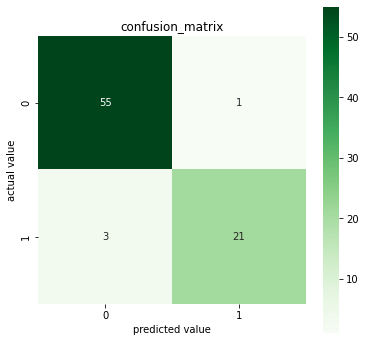

In [27]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,square=True,cmap='Greens')
plt.title('confusion_matrix')
plt.xlabel('predicted value')
plt.ylabel('actual value')
plt.show()

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

